<a href="https://colab.research.google.com/github/meeku18/LR-predict/blob/main/Bike_count_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be using linaer regression to predict the number of bikes required at each hour for the stable supply of rental bikes

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

Seoul Bike Sharing Demand
Donated on 2/29/2020
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information
source:https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [193]:
dataset_col=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","solar_rad","rain","snow","functional"]
df=pd.read_csv("SeoulBikeData 6.csv").drop(["Date","Holiday","Seasons"],axis=1)

df.columns=dataset_col

In [194]:
df["functional"]=(df["functional"]=="Yes").astype(int)
df=(df[df["hour"]==12])
df=(df.drop(["hour"],axis=1))

In [195]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,solar_rad,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


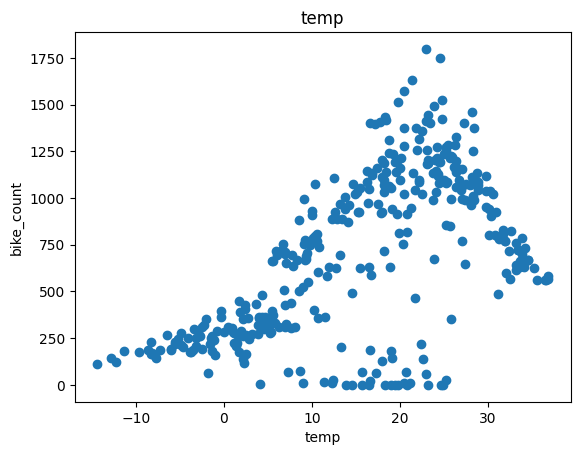

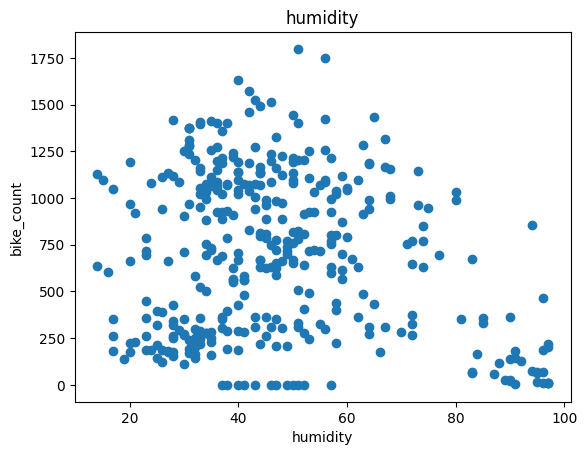

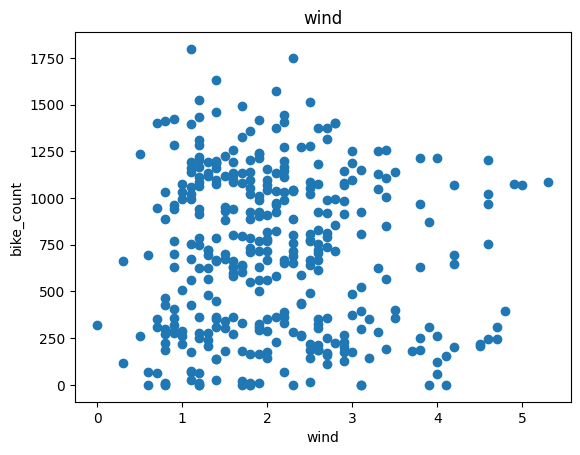

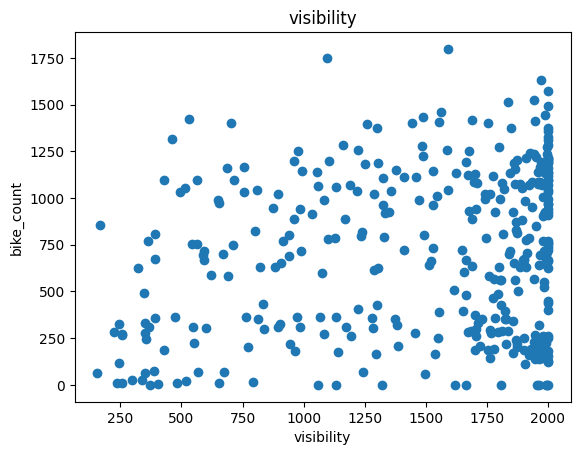

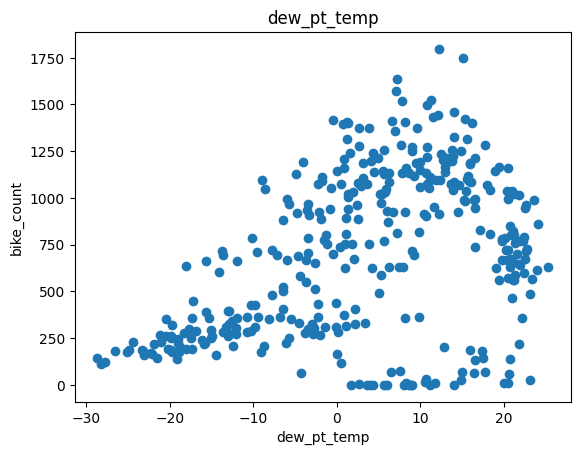

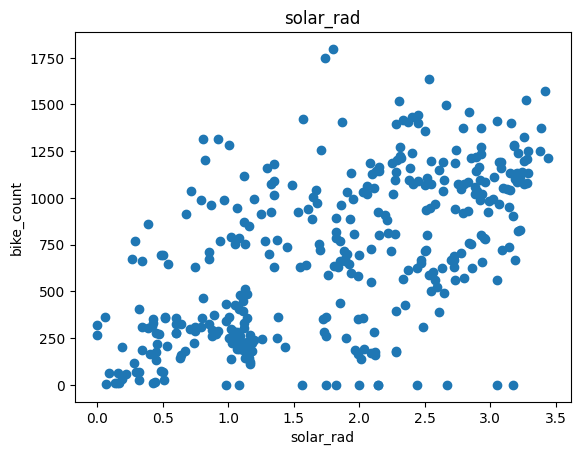

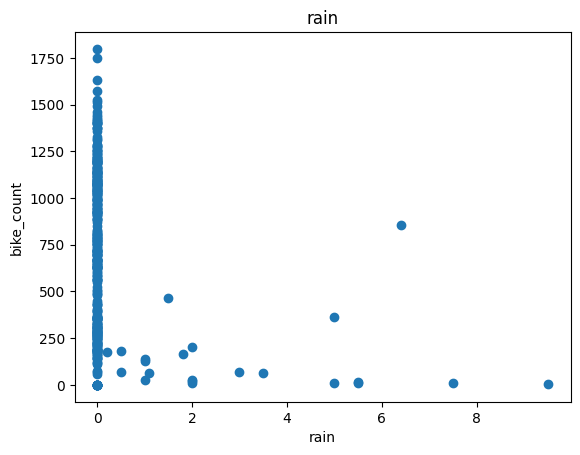

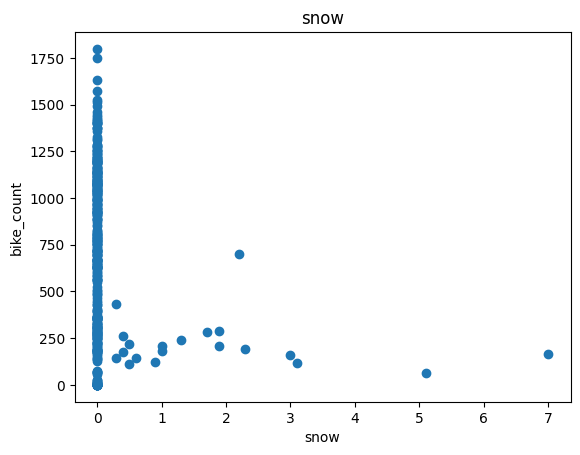

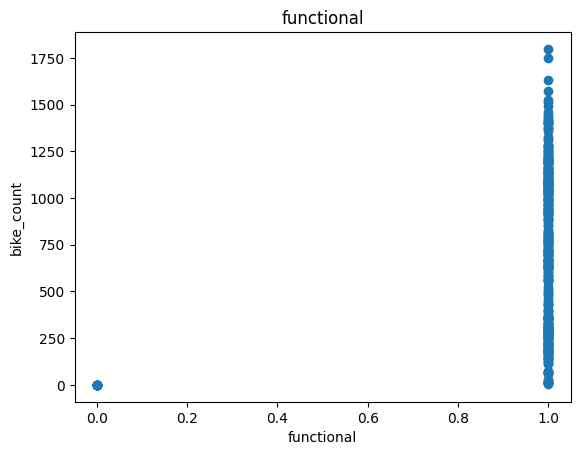

In [196]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("bike_count")
  plt.show()

In [197]:
df=df.drop(["wind","functional","visibility"],axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,solar_rad,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [198]:
train,val,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [199]:
def getx_y(dataframe,y_label,x_label=None):
  dataframe=copy.deepcopy(dataframe)
  if  x_label is None:
    X=dataframe[[c for c in dataframe.columns if c !=y_label]].values
  else:
    if len(x_label)==1:
      X=dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X=dataframe[x_label].values

  Y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((X,Y))
  return data,X,Y

In [200]:
_,x_train_temp,y_train_temp=getx_y(train,"bike_count",x_label=["temp"])
_,x_val_temp,y_val_temp=getx_y(val,"bike_count",x_label=["temp"])
_,x_test_temp,y_test_temp=getx_y(test,"bike_count",x_label=["temp"])

In [201]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [202]:
print(temp_reg.coef_,temp_reg.intercept_)

[[20.49539246]] [368.1394892]


In [203]:
#r square square
temp_reg.score(x_train_temp,y_train_temp)

0.2861096824536279

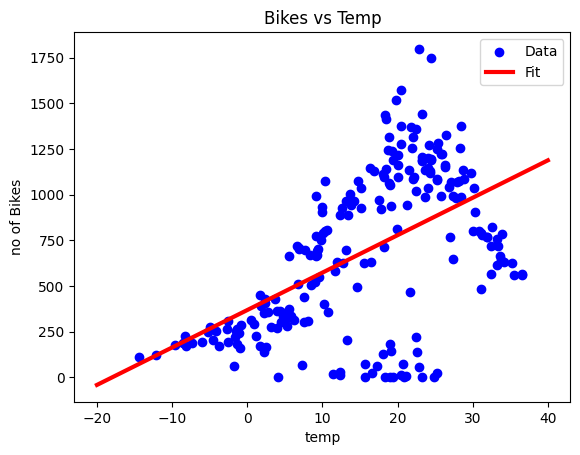

In [204]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("temp")
plt.ylabel("no of Bikes")
plt.show()

Looking at the assumption of LR this line does not fit

MULTIPLE REGRESSION

In [205]:
train,val,test =np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,x_train,y_train=getx_y(train,"bike_count",x_label=df.columns[1:])
_,x_val,y_val=getx_y(val,"bike_count",x_label=df.columns[1:])
_,x_test,y_test=getx_y(test,"bike_count",x_label=df.columns[1:])

In [206]:
all_reg = LinearRegression()
all_reg.fit(x_train,y_train)

LinearRegression()

In [207]:
all_reg.score(x_test,y_test)

0.46421331854996717

In [208]:
y_predict=all_reg.predict(x_test)
print(y_predict)

[[ 511.554204  ]
 [ 889.35298114]
 [1008.62890028]
 [1000.52360095]
 [1085.50515374]
 [ 712.72368805]
 [ 982.05005638]
 [ 796.81139081]
 [ 338.45838455]
 [1074.58277212]
 [ 579.94901262]
 [1180.48502583]
 [1072.79740661]
 [1076.77171553]
 [ 265.94651787]
 [ 418.36183526]
 [ 795.90544829]
 [1081.8989597 ]
 [ 523.00550104]
 [1139.53689417]
 [ 415.17386392]
 [ 850.07656005]
 [1176.82336824]
 [ 817.89996034]
 [1256.57406004]
 [ 629.44799762]
 [-542.81618353]
 [ 445.08875038]
 [ 855.14405928]
 [ 877.6517722 ]
 [ 288.70660821]
 [ 919.47054327]
 [ 224.92994082]
 [ 838.58377112]
 [ 773.6628894 ]
 [ 365.48604813]
 [ 725.76377534]
 [ 168.8951063 ]
 [1063.1572861 ]
 [1162.13041999]
 [ 860.32216357]
 [1132.31121072]
 [ 316.43513747]
 [ 810.65263208]
 [ 722.62331767]
 [ 690.04217001]
 [ 352.5117629 ]
 [ 848.83476727]
 [1136.41934238]
 [ 636.79132919]
 [ 843.51874788]
 [ 356.15502965]
 [ 360.13180947]
 [ 361.69618925]
 [ 393.55996904]
 [ 306.38248511]
 [ 355.40673483]
 [ 516.832893  ]
 [1138.7603559

In [209]:
np.concatenate((y_predict.reshape(-1,1),y_test.reshape(-1,1)),axis=1)

array([[ 511.554204  ,  351.        ],
       [ 889.35298114, 1145.        ],
       [1008.62890028, 1242.        ],
       [1000.52360095, 1206.        ],
       [1085.50515374,  803.        ],
       [ 712.72368805,  907.        ],
       [ 982.05005638,  640.        ],
       [ 796.81139081,  996.        ],
       [ 338.45838455,  661.        ],
       [1074.58277212, 1193.        ],
       [ 579.94901262, 1076.        ],
       [1180.48502583,  759.        ],
       [1072.79740661, 1058.        ],
       [1076.77171553, 1072.        ],
       [ 265.94651787,  186.        ],
       [ 418.36183526,  157.        ],
       [ 795.90544829, 1145.        ],
       [1081.8989597 ,  565.        ],
       [ 523.00550104,  283.        ],
       [1139.53689417, 1197.        ],
       [ 415.17386392,  188.        ],
       [ 850.07656005,  791.        ],
       [1176.82336824,  629.        ],
       [ 817.89996034,  818.        ],
       [1256.57406004,  668.        ],
       [ 629.44799762,  7